In [1]:
%cd /content/drive/MyDrive/Colab/0_layout_analysis

/content/drive/MyDrive/Colab/0_layout_analysis


In [2]:
import os
import numpy as np
from sklearn.cluster import KMeans, MeanShift, SpectralClustering
from sklearn.cluster import estimate_bandwidth
from glob import glob
import json
import matplotlib.pyplot as plt
import matplotlib
import cv2
import time
from google.colab.patches import cv2_imshow

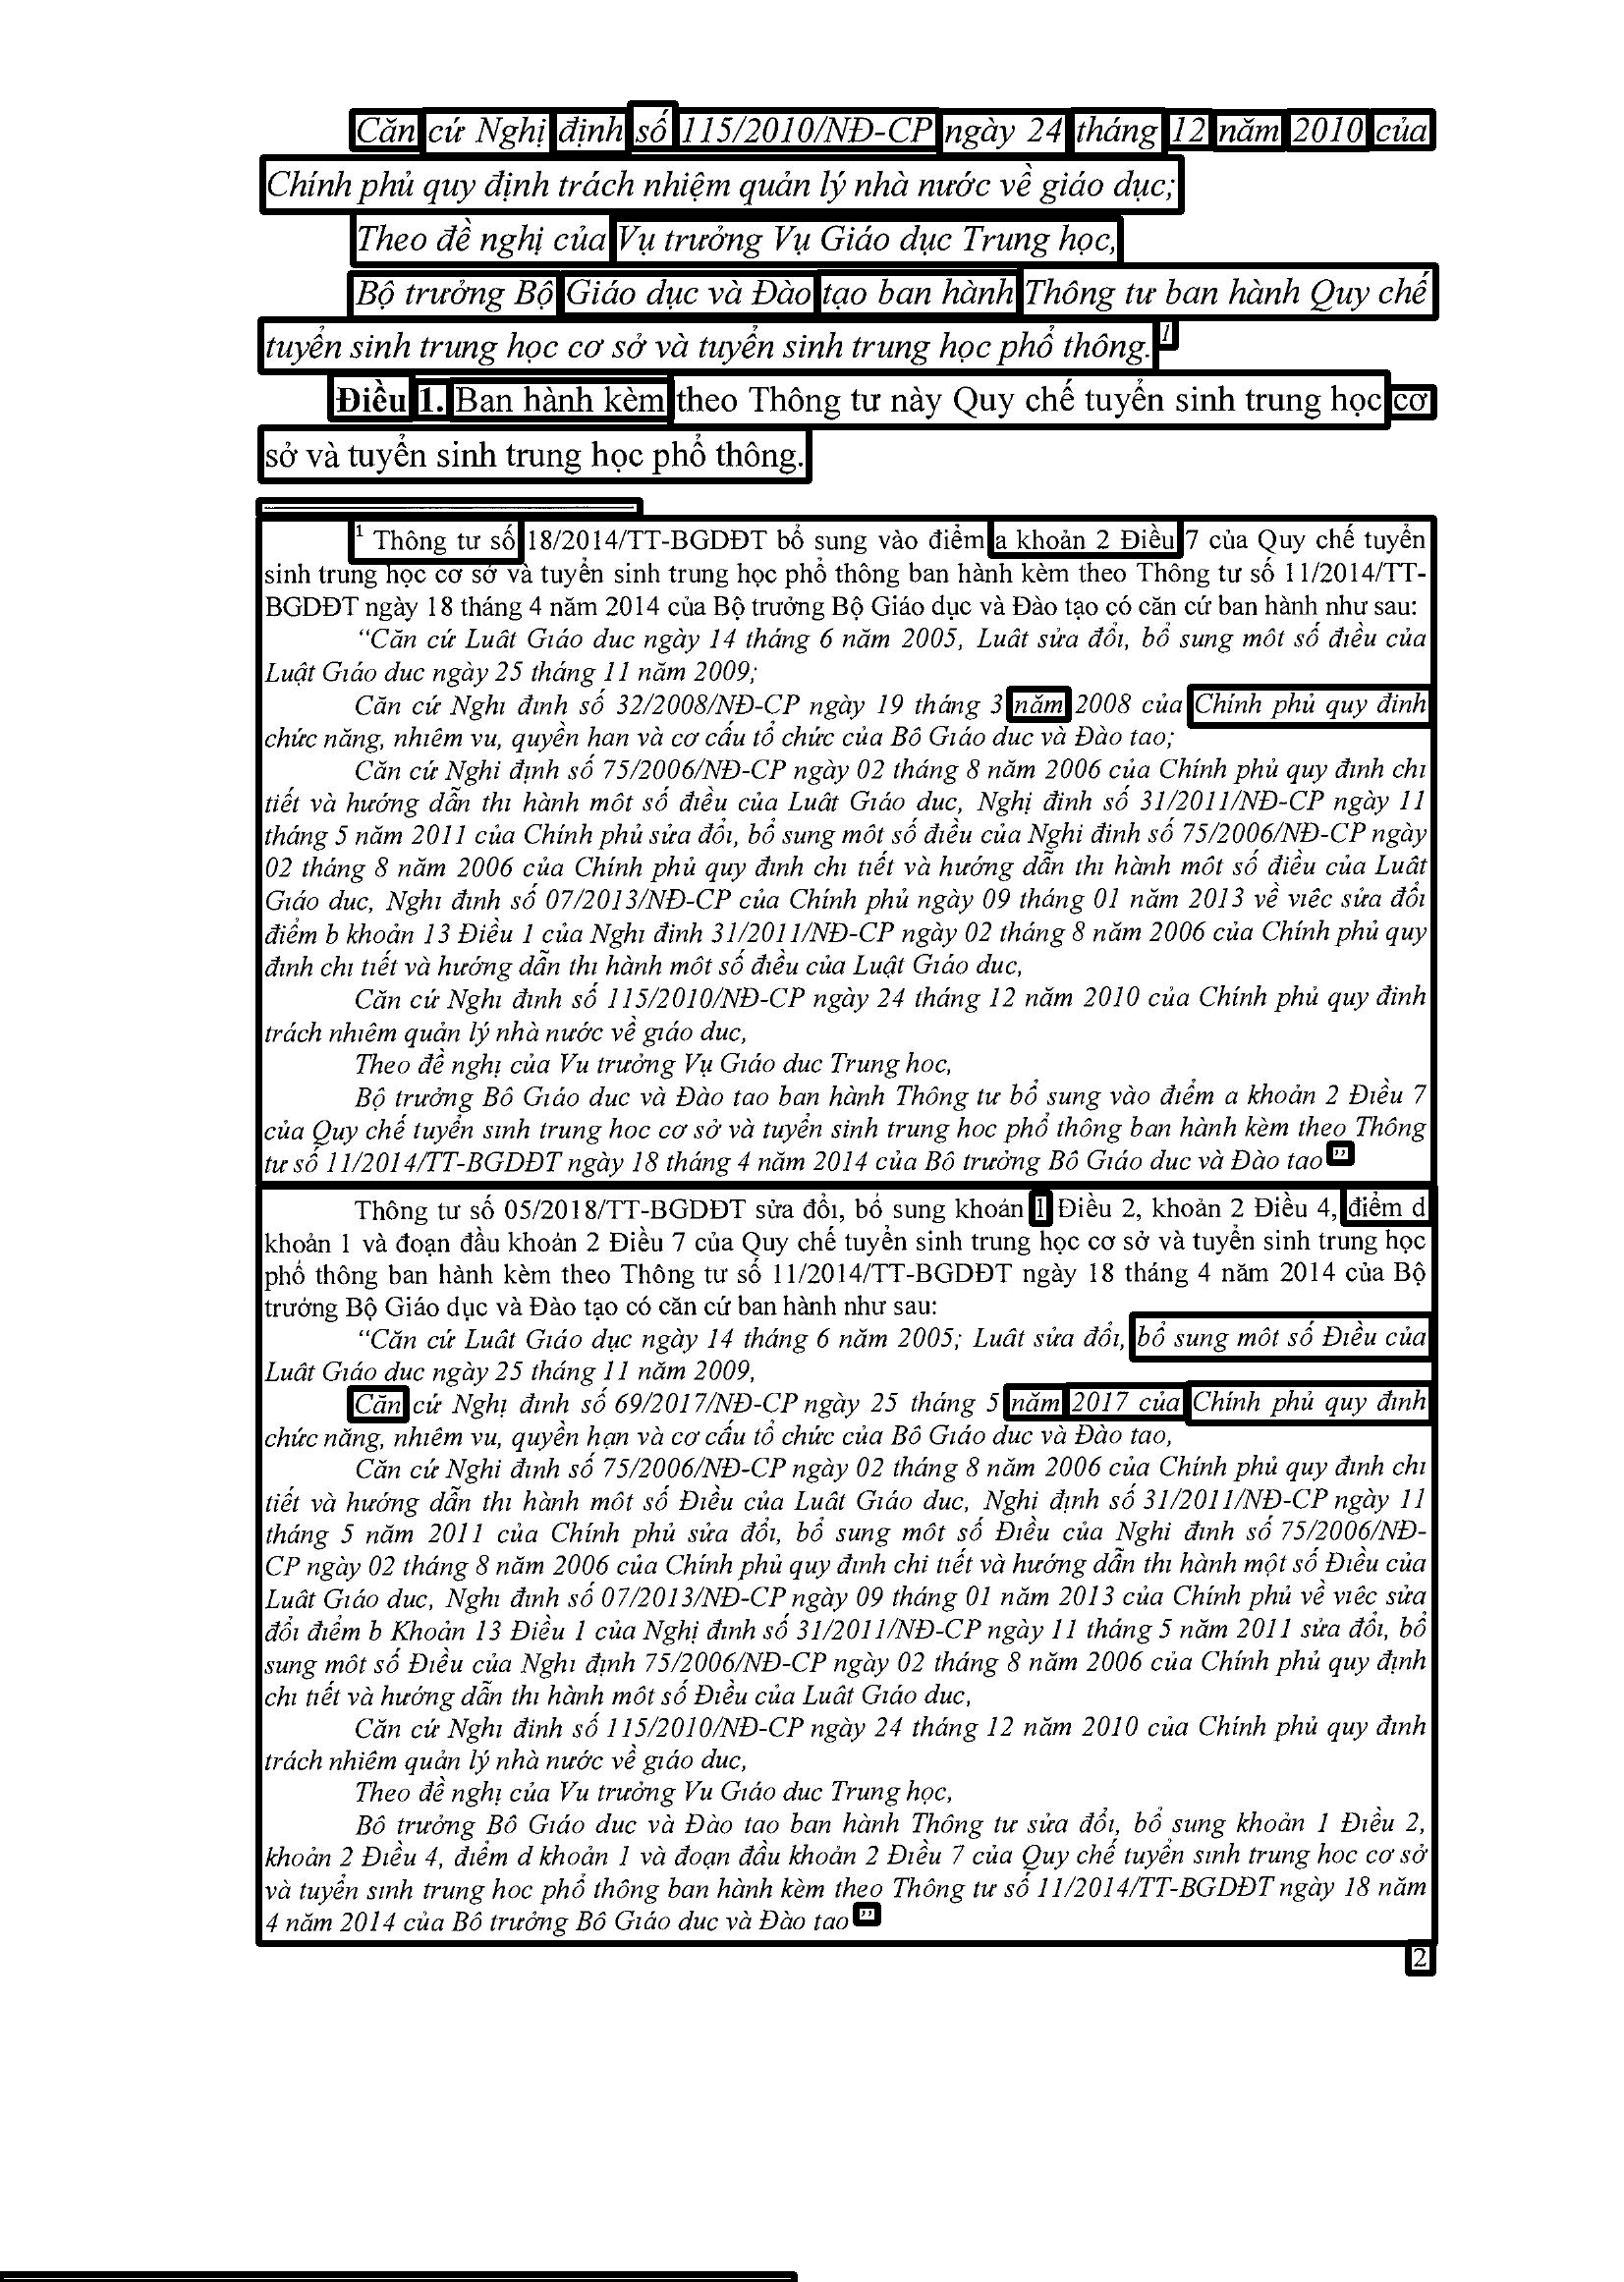

Time taken:  0.00962066650390625


In [5]:
sample_img = cv2.imread('images/03_VBHN_BGDDT.pdf1.jpg')
sample = cv2.cvtColor(sample_img, cv2.COLOR_BGR2GRAY)

ret, th = cv2.threshold(sample,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

def process_par(thresh,output):	
	# assign a rectangle kernel size
	kernel = np.ones((5,5), 'uint8')	
	par_img = cv2.dilate(thresh,kernel,iterations=3)
	
	(contours, _) = cv2.findContours(par_img.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
	
	for cnt in contours:
		x,y,w,h = cv2.boundingRect(cnt)
		cv2.rectangle(output,(x,y),(x+w,y+h),(0,255,0),5)

	return output

tic = time.time()
sample_par = process_par(th, sample)
toc = time.time()
cv2_imshow(sample_par)
print('Time taken: ', toc - tic)